In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn import preprocessing
import umap


C:\Users\Учеба\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv('Zoo.csv')

In [4]:
data


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,mammal
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,insect
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,mollusc.et.al


C:\Users\Учеба\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Учеба\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


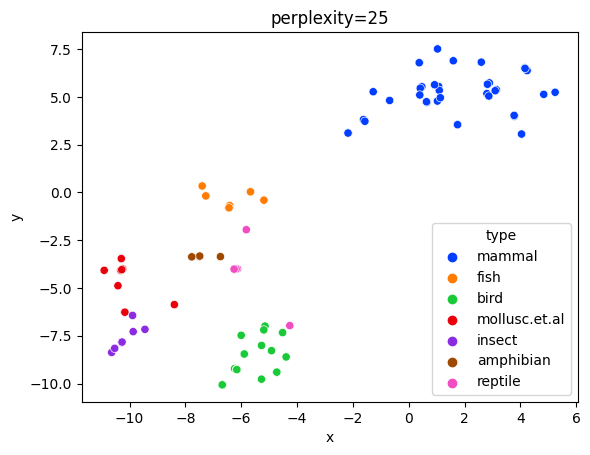

CPU times: total: 5.02 s
Wall time: 999 ms


In [6]:
%%time
D = data.drop(['type'], axis = 1)
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns = D.columns)
T = TSNE(n_components = 2, perplexity = 25, random_state = 123)
TSNE_features = T.fit_transform(D)
DATA = D.copy()
DATA['x'] = TSNE_features[:,0]
DATA['y'] = TSNE_features[:,1]
fig = plt.figure()
plt.title('perplexity=25')
sns.scatterplot(x = 'x', y = 'y', hue = data['type'], data = DATA, palette = 'bright')
plt.show()

C:\Users\Учеба\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Учеба\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


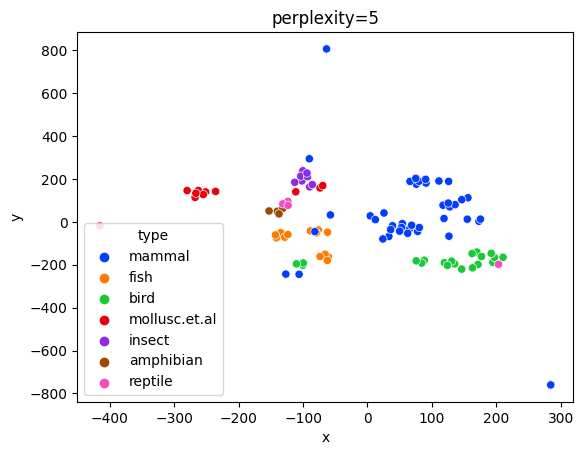

CPU times: total: 4.14 s
Wall time: 720 ms


In [7]:
%%time
T = TSNE(n_components = 2, perplexity = 5, random_state = 123)
TSNE_features = T.fit_transform(D)
DATA = D.copy()
DATA['x'] = TSNE_features[:,0]
DATA['y'] = TSNE_features[:,1]
fig = plt.figure()
plt.title('perplexity=5')
sns.scatterplot(x = 'x', y = 'y', hue = data['type'], data = DATA, palette = 'bright')
plt.show()

C:\Users\Учеба\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Учеба\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


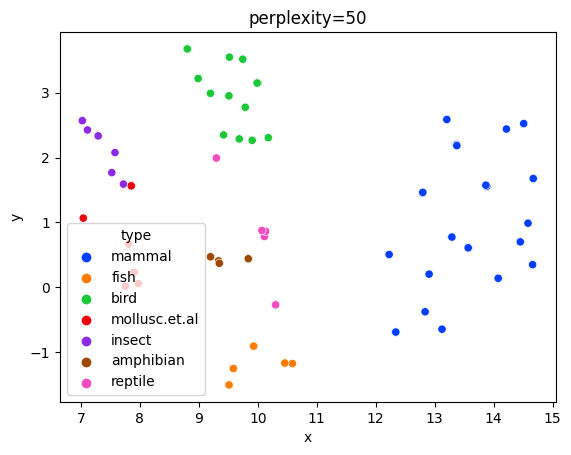

CPU times: total: 4.52 s
Wall time: 768 ms


In [8]:
%%time
T = TSNE(n_components = 2, perplexity = 50, random_state = 123)
TSNE_features = T.fit_transform(D)
DATA = D.copy()
DATA['x'] = TSNE_features[:,0]
DATA['y'] = TSNE_features[:,1]
fig = plt.figure()
plt.title('perplexity=50')
sns.scatterplot(x = 'x', y = 'y', hue = data['type'], data = DATA, palette = 'bright')
plt.show()

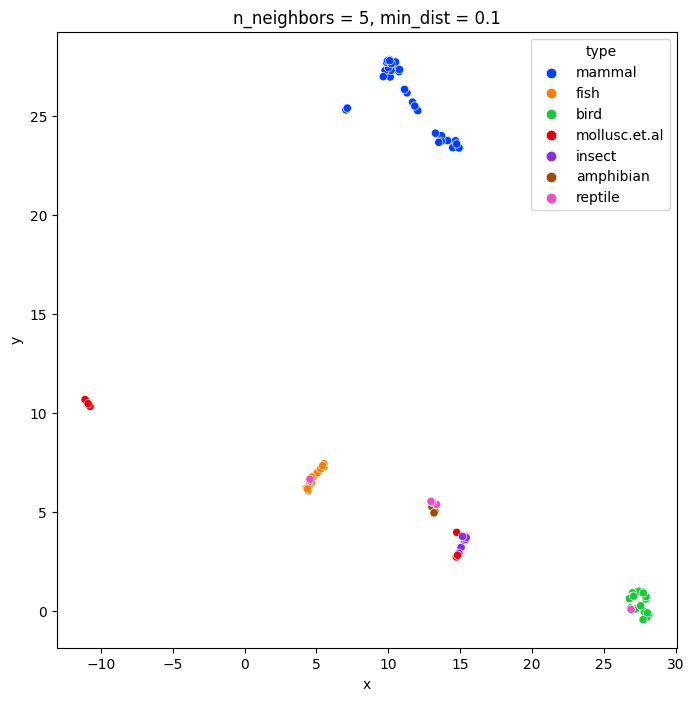

In [17]:
%%time
umap = umap.UMAP(n_neighbors = 5, min_dist = 0.1, random_state = 123)
umap_result = umap.fit_transform(D.iloc[:, 1:])
DATA = D.copy()
DATA['x'] = umap_result[:,0]
DATA['y'] = umap_result[:,1]
fig = plt.figure(figsize = (8, 8))
plt.title('n_neighbors = 5, min_dist = 0.1')
sns.scatterplot(x = 'x', y = 'y', hue = data['type'], data = DATA, palette = 'bright')
plt.show()

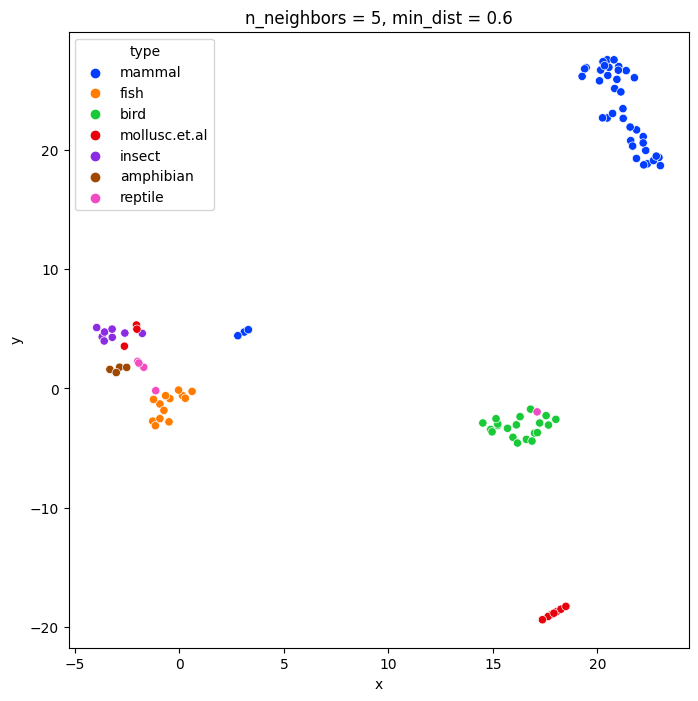

CPU times: total: 1.64 s
Wall time: 960 ms


In [23]:
%%time
umap = umap.UMAP(n_neighbors = 5, min_dist = 0.6, random_state = 123)
umap_result = umap.fit_transform(D.iloc[:, 1:])
DATA = D.copy()
DATA['x'] = umap_result[:,0]
DATA['y'] = umap_result[:,1]
fig = plt.figure(figsize = (8, 8))
plt.title('n_neighbors = 5, min_dist = 0.6')
sns.scatterplot(x = 'x', y = 'y', hue = data['type'], data = DATA, palette = 'bright')
plt.show()

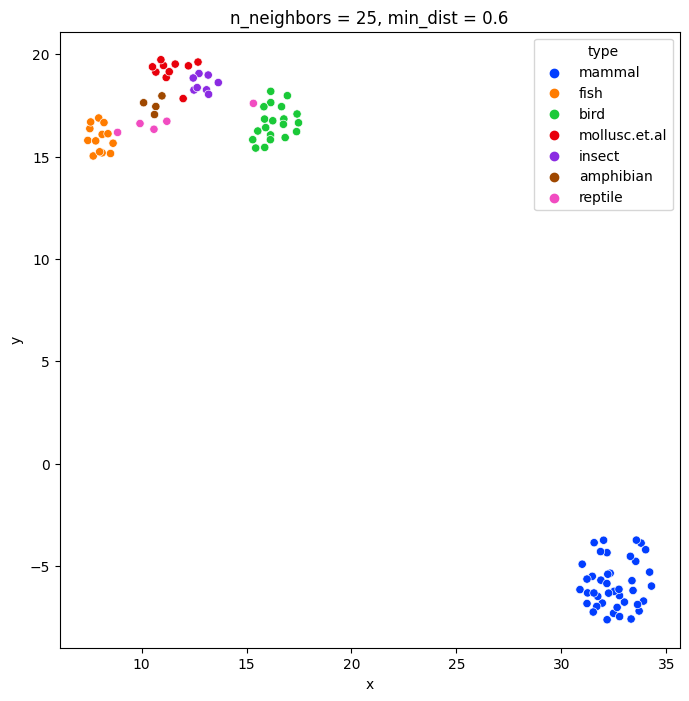

CPU times: total: 2 s
Wall time: 1.25 s


In [26]:
%%time
umap = umap.UMAP(n_neighbors = 25, min_dist = 0.6, random_state = 123)
umap_result = umap.fit_transform(D.iloc[:, 1:])
DATA = D.copy()
DATA['x'] = umap_result[:,0]
DATA['y'] = umap_result[:,1]
fig = plt.figure(figsize = (8, 8))
plt.title('n_neighbors = 25, min_dist = 0.6')
sns.scatterplot(x = 'x', y = 'y', hue = data['type'], data = DATA, palette = 'bright')
plt.show()

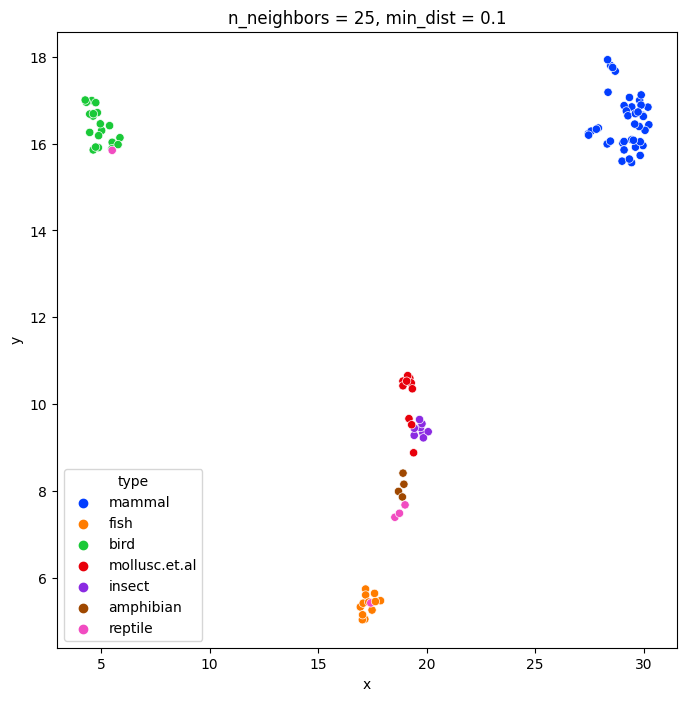

CPU times: total: 1.73 s
Wall time: 1.1 s


In [28]:
%%time
umap = umap.UMAP(n_neighbors = 25, min_dist = 0.1, random_state = 123)
umap_result = umap.fit_transform(D.iloc[:, 1:])
DATA = D.copy()
DATA['x'] = umap_result[:,0]
DATA['y'] = umap_result[:,1]
fig = plt.figure(figsize = (8, 8))
plt.title('n_neighbors = 25, min_dist = 0.1')
sns.scatterplot(x = 'x', y = 'y', hue = data['type'], data = DATA, palette = 'bright')
plt.show()

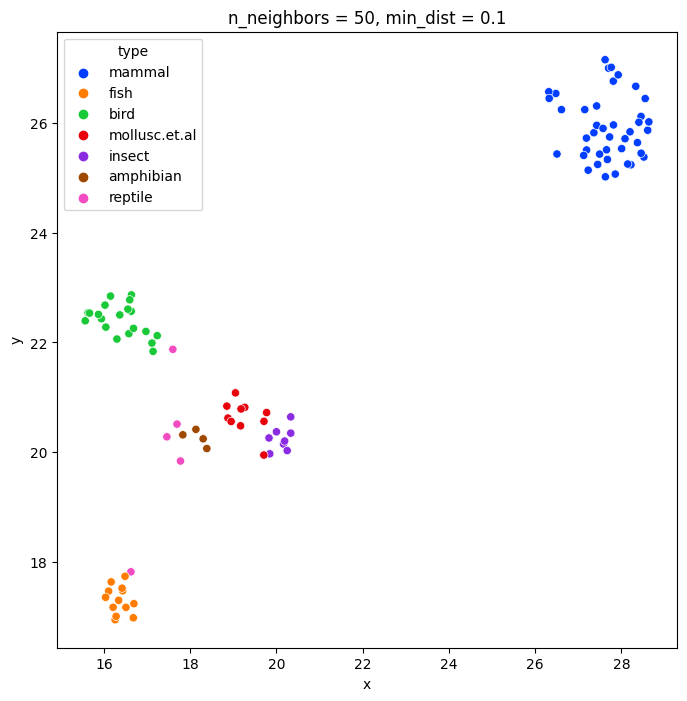

CPU times: total: 1.75 s
Wall time: 1.1 s


In [30]:
%%time
umap = umap.UMAP(n_neighbors = 50, min_dist = 0.1, random_state = 123)
umap_result = umap.fit_transform(D.iloc[:, 1:])
DATA = D.copy()
DATA['x'] = umap_result[:,0]
DATA['y'] = umap_result[:,1]
fig = plt.figure(figsize = (8, 8))
plt.title('n_neighbors = 50, min_dist = 0.1')
sns.scatterplot(x = 'x', y = 'y', hue = data['type'], data = DATA, palette = 'bright')
plt.show()

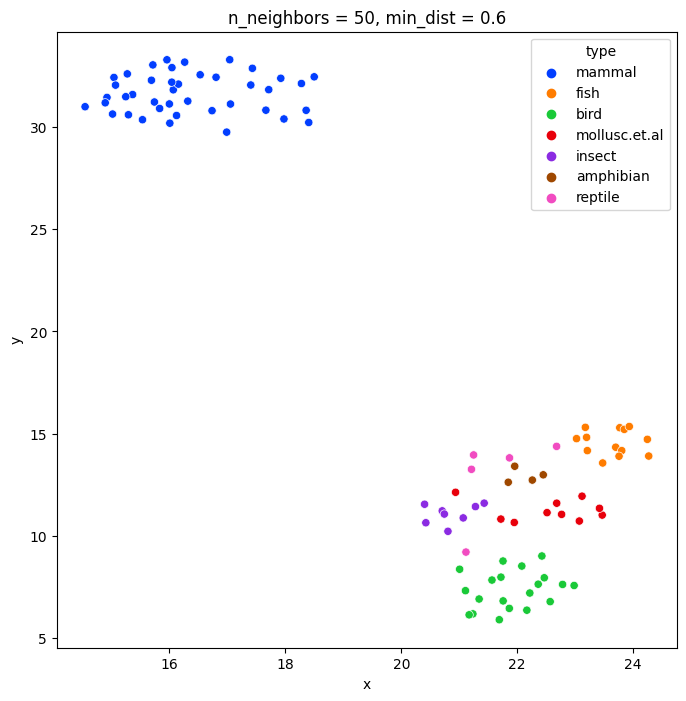

CPU times: total: 2.05 s
Wall time: 1.29 s


In [33]:
%%time
umap = umap.UMAP(n_neighbors = 50, min_dist = 0.6, random_state = 123)
umap_result = umap.fit_transform(D.iloc[:, 1:])
DATA = D.copy()
DATA['x'] = umap_result[:,0]
DATA['y'] = umap_result[:,1]
fig = plt.figure(figsize = (8, 8))
plt.title('n_neighbors = 50, min_dist = 0.6')
sns.scatterplot(x = 'x', y = 'y', hue = data['type'], data = DATA, palette = 'bright')
plt.show()